# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0304 Гурьянов Савелий и Никитин Дмитрий. Вариант №4.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Единичный цифровой импульс:
$\delta_d(k) = \begin{cases}
1, k = 0 \\
0, k \neq 0
\end{cases}
,k =...,-2,-1,0,1,2,...
$

Дискретный единичный скачок:
$\sigma_d(k) = \begin{cases}
1, k \geq 0 \\
0, k < 0
\end{cases}
,k =...,-2,-1,0,1,2,...
$

Дискретная экспоненциальная функция:
$s1(k) = \begin{cases}
0, k < 0 \\
a^k, k \geq 0
\end{cases}
,k =...,-2,-1,0,1,2,...
$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.
1. Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  
Пояснить:  
    a. взаимосвязь между дискретным и дискретным нормированным временем;  
    b. различие между единичным цифровым импульсом и дельта-функцией.  

2. Смоделировать дискретный единичный скачок $\sigma_d(k)$
с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  
Пояснить:  
    a. соответствие между дискретным и аналоговым единичными скачками;  
    b. чему равна частота дискретизации дискретного единичного скачка.  

3. Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  Пояснить соответствие между дискретной и аналоговой экспонентами.

4. Смоделировать дискретный комплексный гармонический сигнал $s_2(k)=C \cdot exp(j\hat{\omega}_0k)$с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0,N−1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.  
5. Вывести графики последовательностей $\delta_d(k), \sigma_d(k)$ и $s_1(k)$, задержанных на m отсчетов, на интервале времени $n \in [0,N−1]$. Записать формулы задержанных последовательностей.  
6. Сделать выводы.

## Выполнение работы

### 0. Исходные данные

In [1]:
import math

# Номер бригады
Nb = 4
# Длина последовательности
N = 30 + Nb % 5
# Период дискретизации
T = 0.0005 * (1 + Nb % 3)
# Основание экспоненты
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
# Амплитуда гармонического сигнала
C = 1 + Nb % 5
# Частота гармонического сигнала
w0 = math.pi / (6 + Nb % 5)
# Задержка
m = 5 + Nb % 5

### 1. Моделирование единичного цифрового импульса

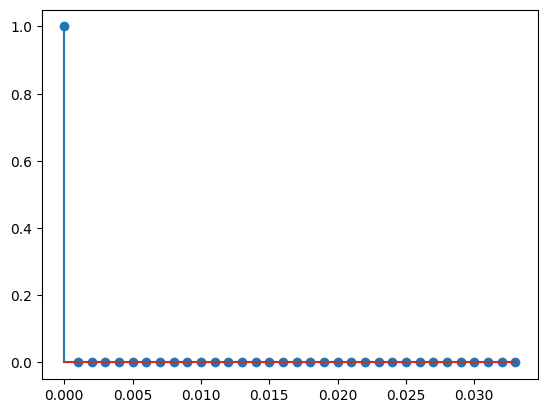

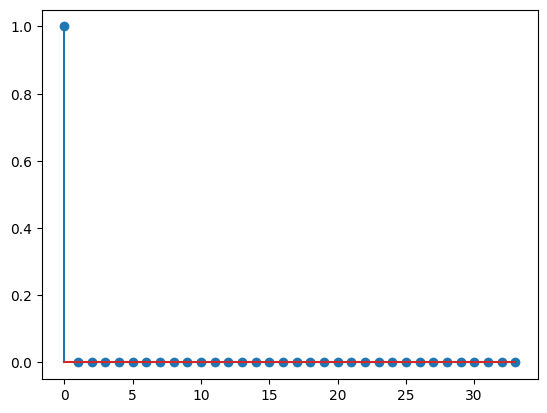

In [2]:
from matplotlib import pyplot

def singleImpulse(x):
    return int(x == 0)

discreteTime = [T*i for i in range(N)]
discreteTimeImpulse = [singleImpulse(i) for i in discreteTime]
normalizedTime = [i for i in range(N)]
normalizedTimeImpulse = [singleImpulse(i) for i in normalizedTime]
def plot(x, y):
    pyplot.stem(x, y)
    pyplot.show()

# Первый график - для дискретного времени
plot(discreteTime, discreteTimeImpulse)
# Второй график - для нормализованного времени
plot(normalizedTime, normalizedTimeImpulse)

Дискретное и нормализованное время связано следующим образом: $t_{диск} = T \cdot t_{норм}$, где T - период дискретизации.
Единичный цифровой импульс отличается от дельта-функции тем, что при нуле его значение 1, а значение дельта-функции - равно бесконечности. 

### 2. Моделирование дискретного единичного скачка

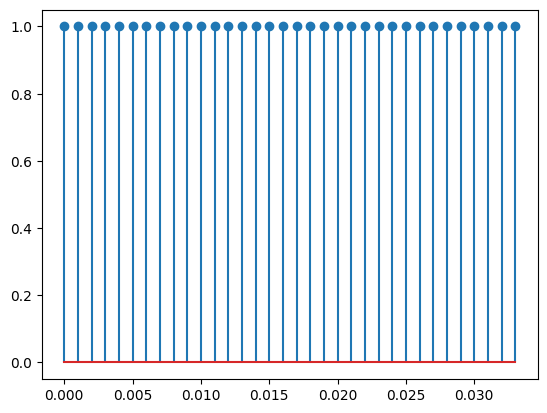

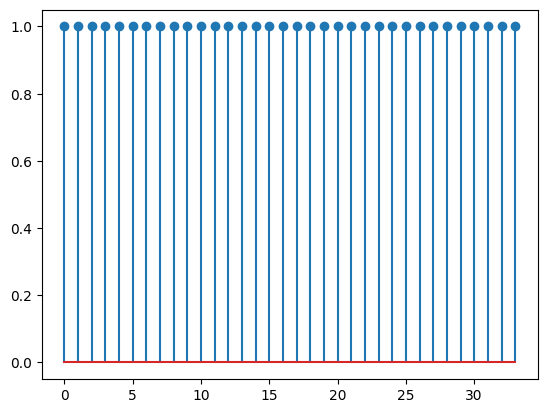

In [3]:
def singleHop(x):
    return int(x >= 0)

discreteTimeHop = [singleHop(i) for i in discreteTime]
normalizedTimeHop = [singleHop(i) for i in normalizedTime]

# Первый график - для дискретного времени
plot(discreteTime, discreteTimeHop)
# Второй график - для нормализованного времени
plot(normalizedTime, normalizedTimeHop)

Соответствие между дискретным и аналоговым скачками: дискретный скачок является частным случаем аналогового скачка с тем отличием, что он определён на множестве целых чисел, а аналоговый - на множестве действительных чисел, причём аналоговый скачок может принимать значения, отличные от 0 и 1.
Частота дискретизации обратна периоду дискретизации, в данном случае, она равна:

In [4]:
1/T

1000.0

### 3. Моделирование дискретной экспоненциальной функции

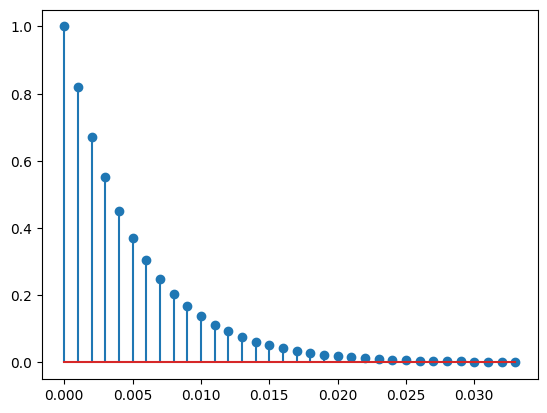

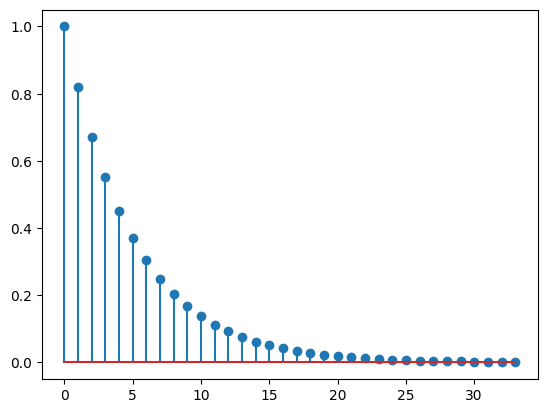

In [5]:
def expFunc(a, x):
    return 0 if x < 0 else a**x

discreteTimeExp = [expFunc(a, i/T) for i in discreteTime]
normalizedTimeExp = [expFunc(a, i) for i in normalizedTime]
# Первый график - для дискретного времени
plot(discreteTime, discreteTimeExp)
# Второй график - для нормализованного времени
plot(normalizedTime, normalizedTimeExp)

Соответствие между дискретными и аналоговыми экспонентами: дискретная экспонента является частным случаем аналоговой.

### 4. Моделирование дискретного комплексного гармонического сигнала

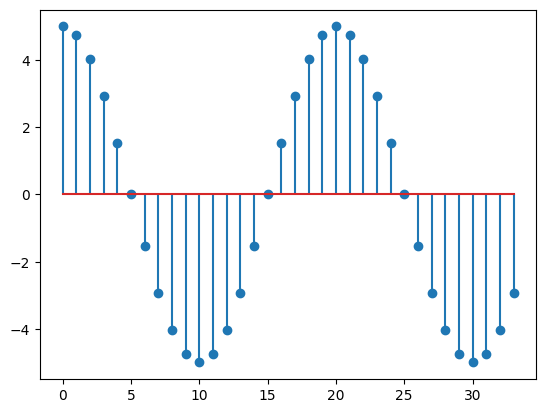

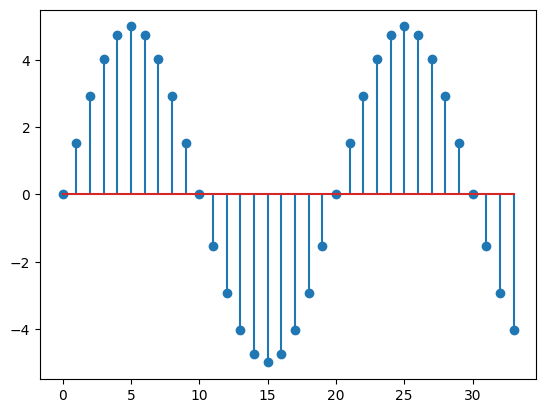

In [6]:
import numpy as np

def discrete_complex_harmonic(k):
    return C * np.exp(1j * w0 * k)

discrete_complex_harmonic_val = normalizedTime
discrete_complex_harmonic_res = [discrete_complex_harmonic(i) for i in discrete_complex_harmonic_val]

plot(discrete_complex_harmonic_val, np.real(discrete_complex_harmonic_res))
plot(discrete_complex_harmonic_val, np.imag(discrete_complex_harmonic_res))

По формуле Эйлера:
$C \cdot e^{j\hat{\omega}_0k} = C \cdot cos(\hat {\omega}_0k) + j \cdot C \cdot sin(\hat {\omega}_0k) $, где
$ C \cdot cos(\hat {\omega}_0k) $ - действительная часть, а
$ C \cdot sin(\hat {\omega}_0k)  $ - мнимая часть

### 5. Задержанные последовательности

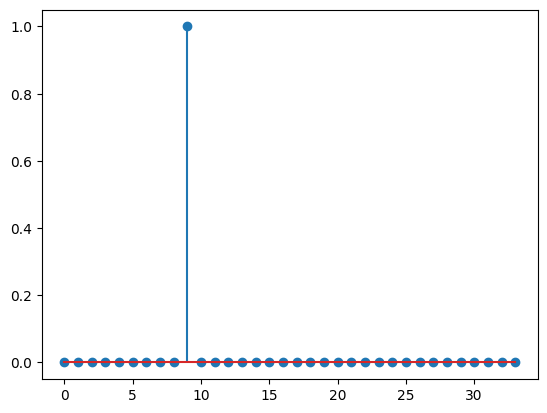

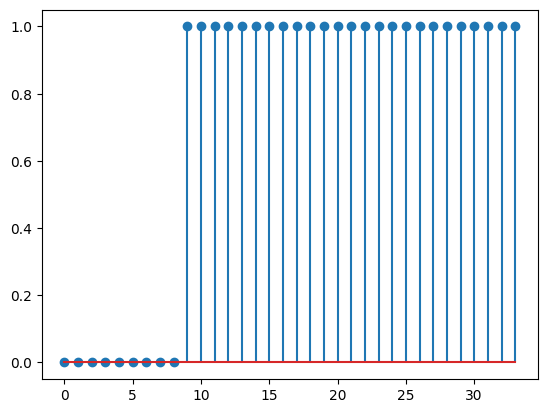

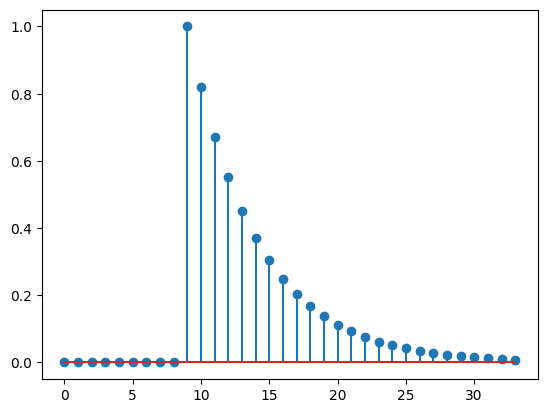

In [7]:
delay_normalized_time = [i - m for i in normalizedTime]

delay_normalized_time_impulse = [singleImpulse(i) for i in delay_normalized_time]
delay_normalized_time_hop = [singleHop(i) for i in delay_normalized_time]
delay_normalized_time_exp = [expFunc(a, i) for i in delay_normalized_time]

plot(normalizedTime, delay_normalized_time_impulse)
plot(normalizedTime, delay_normalized_time_hop)
plot(normalizedTime, delay_normalized_time_exp)

Единичный цифровой импульс:
$\delta_d(k) = \begin{cases}
1, k = m \\
0, k \neq m
\end{cases}
$

Дискретный единичный скачок:
$\sigma_d(k) = \begin{cases}
1, k \geq m \\
0, k < m
\end{cases}
$

Дискретная экспоненциальная функция:
$s1(k) = \begin{cases}
0, k < m \\
a^k, k \geq m
\end{cases}
$

## Выводы

Изучены математическое описание стандартных дискретных сигналов и программные средства их моделирования. На примере jupyter notebook выполнена работа по моделированию сигналов, таких как: единичный цифровой импульс, дискретный единичный скачок, дискретная экспоненциальная функция с задержками на m отсчетов и без, а также дискретный комплексный гармонический сигнал.